# Task 2.1+ Unsupervised preprocessing and visualization
### Modul 12: Application of Machine Learning in Health Care
**Author:** Markus Schwaiger

**Date:** April 7, 2024

---

- Load dataset food.csv
- Get an overview by analyzing dimension, number of missing values and feature scaling
- Preprocess data using z-transformation
- Perform a principal component analysi
- Create a score plot using PC1 and PC2
- Update your git-repository

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load dataset and get an overview

In [3]:
food = pd.read_csv("../data/food.csv", index_col=0) # first column is used as row names
print("Dimension of dataset:", food.shape)
print("Number of missing values:", food.isnull().sum().sum())
food.head()

Dimension of dataset: (25, 9)
Number of missing values: 0


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


- The first column (variable X) is used as row names
- The dataset contains primary numeric features
- The dataset consists of 25 rows and 9 columns (without the first column-variable X)
- There are no missing values in the dataset



## Preprocess data using z-transformation

In [4]:
scaler = StandardScaler()
food_scale = scaler.fit_transform(food)

## Perform a principal component analysis (PCA)

In [5]:
pca = PCA(n_components=2)
pca_food = pca.fit_transform(food_scale)

# Create a DataFrame for PCA results
pca_food_df = pd.DataFrame(data=pca_food, columns=["PC1", "PC2"],index=food.index)
print("Standard deviation PC1:", np.std(pca_food[:, 0]))
print("Standard deviation PC2:", np.std(pca_food[:, 1]))

Standard deviation PC1: 2.0016087463990413
Standard deviation PC2: 1.278670969105684


## Score plot the reduced dataset

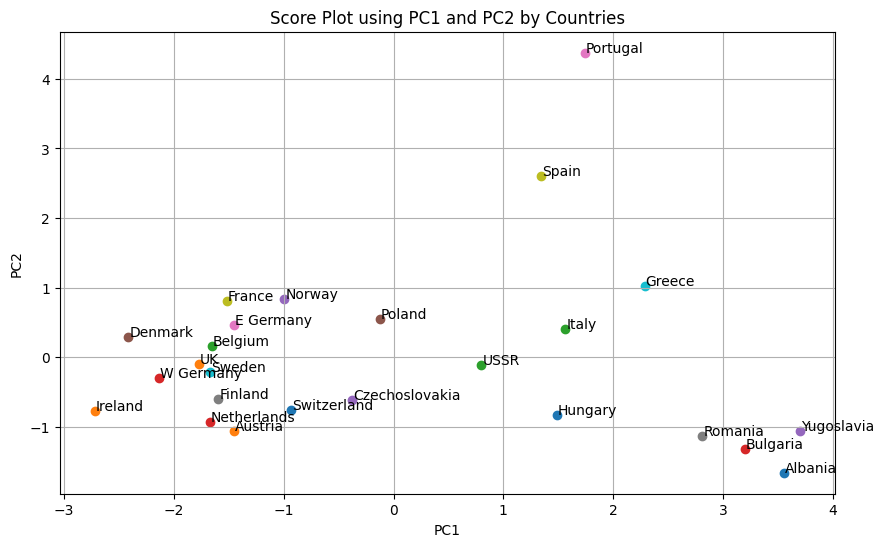

In [6]:
plt.figure(figsize=(10, 6))
for i in range(len(pca_food_df)):
    plt.scatter(pca_food_df.iloc[i]["PC1"], pca_food_df.iloc[i]["PC2"])
    plt.text(pca_food_df.iloc[i]['PC1'] + 0.01, pca_food_df.iloc[i]['PC2'] + 0.01, str(food.index[i]))
plt.title("Score Plot using PC1 and PC2 by Countries")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()